# **Facial Emotion Recognition**






Dataset - https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data


In [110]:
_author_ = " Nithin Raj Anantha "

In [1]:
pwd

'/content'

In [2]:
cd /root

/root


In [3]:
mkdir .kaggle   

In [4]:
cd /root/.kaggle

/root/.kaggle


In [6]:
pwd

'/root/.kaggle'

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
!tar xvzf fer2013.tar.gz

In [12]:
ls

fer2013/  fer2013.tar.gz


In [13]:
cd fer2013

/root/.kaggle/fer2013


In [14]:
ls

fer2013.bib  fer2013.csv  README


In [15]:
""" IMPORT ALL DEPENDENCIES"""


# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [17]:
df = pd.read_csv("fer2013.csv")

In [18]:
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [19]:
df.shape

(35887, 3)

## **Plotting emotion**

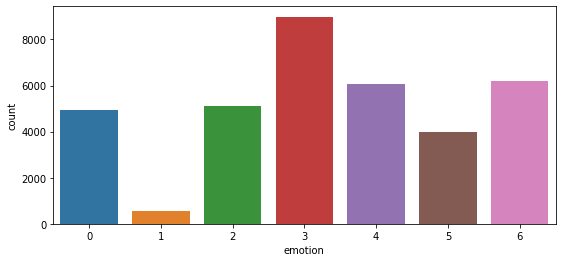

In [20]:
""" matplotlib => to define size , sns => to use counterplot """

plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [21]:
df['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

* where ** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

### Observation
* for Digust we have about 547 images only very less. 

## **Plotting Usage**

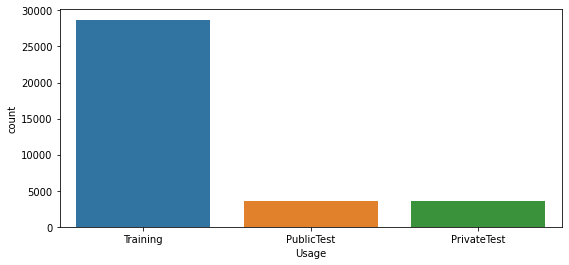

In [22]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [23]:
df['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

# PreProcessing

In [25]:
import cv2
image_size=(48,48)

In [26]:
pixels = df['pixels'].tolist() # Converting the relevant column element into a list for each row
width, height = 48, 48
faces = []

for pixel_sequence in pixels:
    face = [int(pixel) for pixel in pixel_sequence.split(' ')] # Splitting the string by space character as a list
    face = np.asarray(face).reshape(width, height) #converting the list to numpy array in size of 48*48
    face = cv2.resize(face.astype('uint8'),image_size) #resize the image to have 48 cols (width) and 48 rows (height)
    faces.append(face.astype('float32')) #makes the list of each images of 48*48 and their pixels in numpyarray form
faces = np.asarray(faces) #converting the list into numpy array
faces = np.expand_dims(faces, -1) #Expand the shape of an array -1=last dimension => means color space
emotions = pd.get_dummies(df['emotion']).to_numpy() #doing the one hot encoding type on emotions

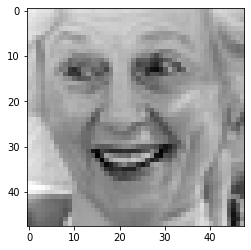

In [131]:
plt.imshow(faces[25].squeeze(),cmap='gray')

In [28]:
print(faces.shape)
print(faces[0].ndim)
print(type(faces))

(35887, 48, 48, 1)
3
<class 'numpy.ndarray'>


In [29]:
print(emotions[0]) #Emotion after preprocessing

[1 0 0 0 0 0 0]


In [30]:
print(emotions.shape)
print(emotions.ndim)
print(type(emotions))

(35887, 7)
2
<class 'numpy.ndarray'>


# Splitting the dataset

## Scaling the pixels between -1 and 1

In [31]:
x = faces.astype('float32')
x = x / 255.0 #Dividing the pixels by 255 for normalization  => range(0,1)

# Scaling the pixels value in range(-1,1)
x = x - 0.5
x = x * 2.0

In [32]:
print(x[0])

[[[-0.45098037]
  [-0.372549  ]
  [-0.35686272]
  ...
  [-0.5921569 ]
  [-0.6627451 ]
  [-0.6784314 ]]

 [[-0.49019605]
  [-0.52156866]
  [-0.54509807]
  ...
  [-0.56078434]
  [-0.5921569 ]
  [-0.654902  ]]

 [[-0.60784316]
  [-0.6627451 ]
  [-0.5764706 ]
  ...
  [-0.6156863 ]
  [-0.56078434]
  [-0.6313726 ]]

 ...

 [[-0.2862745 ]
  [-0.49019605]
  [-0.67058825]
  ...
  [-0.4352941 ]
  [-0.56078434]
  [-0.6627451 ]]

 [[-0.3960784 ]
  [-0.35686272]
  [-0.38039213]
  ...
  [-0.17647058]
  [-0.45098037]
  [-0.6392157 ]]

 [[-0.3960784 ]
  [-0.4352941 ]
  [-0.34117645]
  ...
  [-0.16862744]
  [-0.14509803]
  [-0.35686272]]]


In [33]:
type(x)

numpy.ndarray

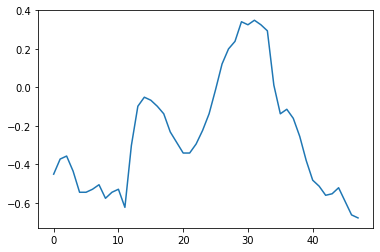

In [34]:
plt.plot(x[0,0])
plt.show()

In [35]:
print(x.min(),x.max()) # we can observe that pixels are scale

-1.0 1.0


## Splitting the dataset into train & validation set

In [36]:
num_samples, num_classes = emotions.shape

num_samples = len(x)
num_train_samples = int((1 - 0.2)*num_samples)

# Traning data
train_x = x[:num_train_samples]
train_y = emotions[:num_train_samples]

# Validation data
val_x = x[num_train_samples:]
val_y = emotions[num_train_samples:]

train_data = (train_x, train_y)
val_data = (val_x, val_y)

In [37]:
print('Training Pixels',train_x.shape)  # ==> 4 dims -  no of images , width , height , color
print('Training labels',train_y.shape)

print('Validation Pixels',val_x.shape)
print('Validation labels',val_y.shape)

Training Pixels (28709, 48, 48, 1)
Training labels (28709, 7)
Validation Pixels (7178, 48, 48, 1)
Validation labels (7178, 7)


# Defining Model

In [38]:
#load the libaray to built the model
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2

In [39]:
"""
* keras.__version__
* pip install --upgrade keras
"""

'\n* keras.__version__\n* pip install --upgrade keras\n'

# 1) Simpler CNN

In [40]:
input_shape=(48, 48, 1)
num_classes = 7

In [41]:
""" Building up Model Architecture """

model = Sequential()
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Convolution2D(filters=16, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Convolution2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.5))

model.add(Convolution2D(filters=256, kernel_size=(3, 3), padding='same'))



model.add(BatchNormalization())
model.add(Convolution2D(filters=num_classes, kernel_size=(3, 3), padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax',name='predictions'))



In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0

In [43]:
# parameters
batch_size = 32 #Number of samples per gradient update
num_epochs = 200 # Number of epochs to train the model.
#input_shape = (64, 64, 1)
verbose = 1 #per epohs  progress bar
num_classes = 7 
patience = 50
base_path = 'drive/Colab Notebooks/emotion/simplecnn/'

In [44]:
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

## Data Augmenttion

In [45]:
""" Data Augmentation => taking the batch and apply some series of random transformations (random rotation, resizing, shearing) 

      ===> to increase generalizability of model  """


# data generator Generate batches of tensor image data with real-time data augmentation
data_generator = ImageDataGenerator(
                        featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True)

In [46]:
# model parameters/compilation

""" CONFIGURATION ==>.compile(optimizer, loss , metrics) """



model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (Conv2D)         (None, 48, 48, 16)        800       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        12560     
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 48, 48, 16)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0

In [47]:
datasets = ['fer2013']
num_epochs = 30
base_path="/content"
for dataset_name in datasets:
    print('Training dataset:', dataset_name)

    #callbacks
    log_file_path = dataset_name + '_emotion_training.log'

    csv_logger = CSVLogger(log_file_path, append=False)
    early_stop = EarlyStopping('val_loss', patience=patience)
    reduce_lr = ReduceLROnPlateau('val_loss', factor=0.1,patience=int(patience/4), verbose=1)
    
    trained_models_path = base_path + dataset_name + 'simple_cnn'
    model_names = trained_models_path + '.{epoch:02d}-{val_loss:.2f}.hdf5'      # if error "acc" in 1 line ... don't confuse check entire block since fit() generates a inner loop
    model_checkpoint = ModelCheckpoint(model_names, 'val_loss', verbose=1,save_best_only=True)
    my_callbacks = [model_checkpoint, csv_logger, early_stop, reduce_lr]

    # loading dataset
    train_faces, train_emotions = train_data
    history=model.fit_generator(data_generator.flow(train_faces, train_emotions,
                                            batch_size),
                        epochs=num_epochs, verbose=1
                        ,callbacks=my_callbacks,validation_data =val_data)   #not callbacks = [my_callbacks] since we my_callbacks is already a list 

Training dataset: fer2013
Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


898/898 [==============================] - 49s 20ms/step - loss: 1.8624 - accuracy: 0.2515 - val_loss: 1.6203 - val_accuracy: 0.3566

Epoch 00001: val_loss improved from inf to 1.62030, saving model to /contentfer2013simple_cnn.01-1.62.hdf5
Epoch 2/30
898/898 [==============================] - 17s 19ms/step - loss: 1.6603 - accuracy: 0.3414 - val_loss: 1.5608 - val_accuracy: 0.4033

Epoch 00002: val_loss improved from 1.62030 to 1.56081, saving model to /contentfer2013simple_cnn.02-1.56.hdf5
Epoch 3/30
898/898 [==============================] - 17s 19ms/step - loss: 1.5977 - accuracy: 0.3706 - val_loss: 1.4327 - val_accuracy: 0.4365

Epoch 00003: val_loss improved from 1.56081 to 1.43266, saving model to /contentfer2013simple_cnn.03-1.43.hdf5
Epoch 4/30
898/898 [==============================] - 17s 19ms/step - loss: 1.5362 - accuracy: 0.4033 - val_loss: 1.4305 - val_accuracy: 0.4542

Epoch 00004: val_loss improved from 1.43266 to 1.43051, saving model to /contentfer2013simple_cnn.04-1

In [48]:
#evaluate() returns [loss,acc]
score = model.evaluate(val_x, val_y, verbose=1) 
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)


225/225 [==============================] - 1s 5ms/step - loss: 1.1733 - accuracy: 0.5471
Test loss: 1.1733242273330688
Test accuracy: 54.70883250236511


In [49]:
""" metrics collected by history object """
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [50]:
print(history_dict["accuracy"])

[0.286391019821167, 0.3514925539493561, 0.38259780406951904, 0.4070848822593689, 0.4194851815700531, 0.43362709879875183, 0.44644537568092346, 0.4605872631072998, 0.46518513560295105, 0.46950432658195496, 0.47173359990119934, 0.47772476077079773, 0.4862586557865143, 0.48824411630630493, 0.49409592151641846, 0.4955240488052368, 0.49319028854370117, 0.500853419303894, 0.4992162883281708, 0.5021073818206787, 0.5015152096748352, 0.5044759511947632, 0.506670355796814, 0.5137761831283569, 0.5083075165748596, 0.511512041091919, 0.512417733669281, 0.5134278535842896, 0.5143334865570068, 0.5146469473838806]


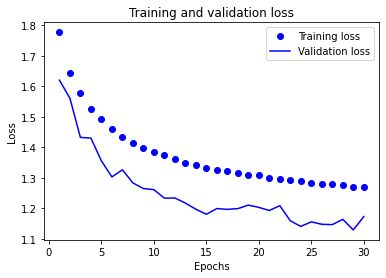

In [51]:
""" Visualising model training history """

import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

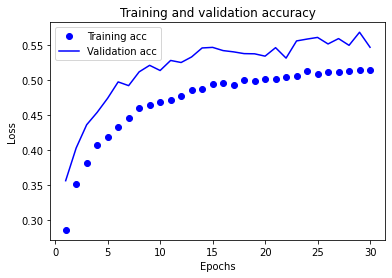

In [52]:
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
predicted_classes = np.argmax(model.predict(val_x), axis=-1)
y_true = np.argmax(val_y, axis=-1)

In [104]:
y_true.shape

(7178,)

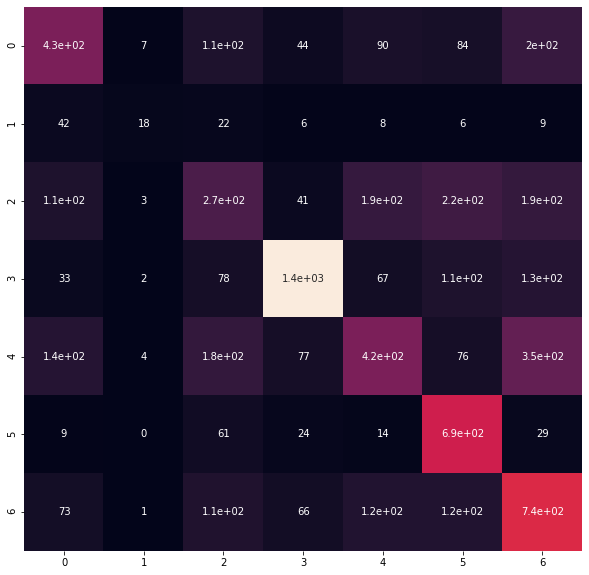

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

In [114]:
 emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Sad", 5: "Surprised", 6: "Neutral"}

  #emojis unicodes #
 emojis = { 0:"\U0001f620",1:"\U0001f922" ,2:"\U0001f628" ,3:"\U0001f60A" , 4:"\U0001f625" ,5:"\U0001f632",6:"\U0001f610" }

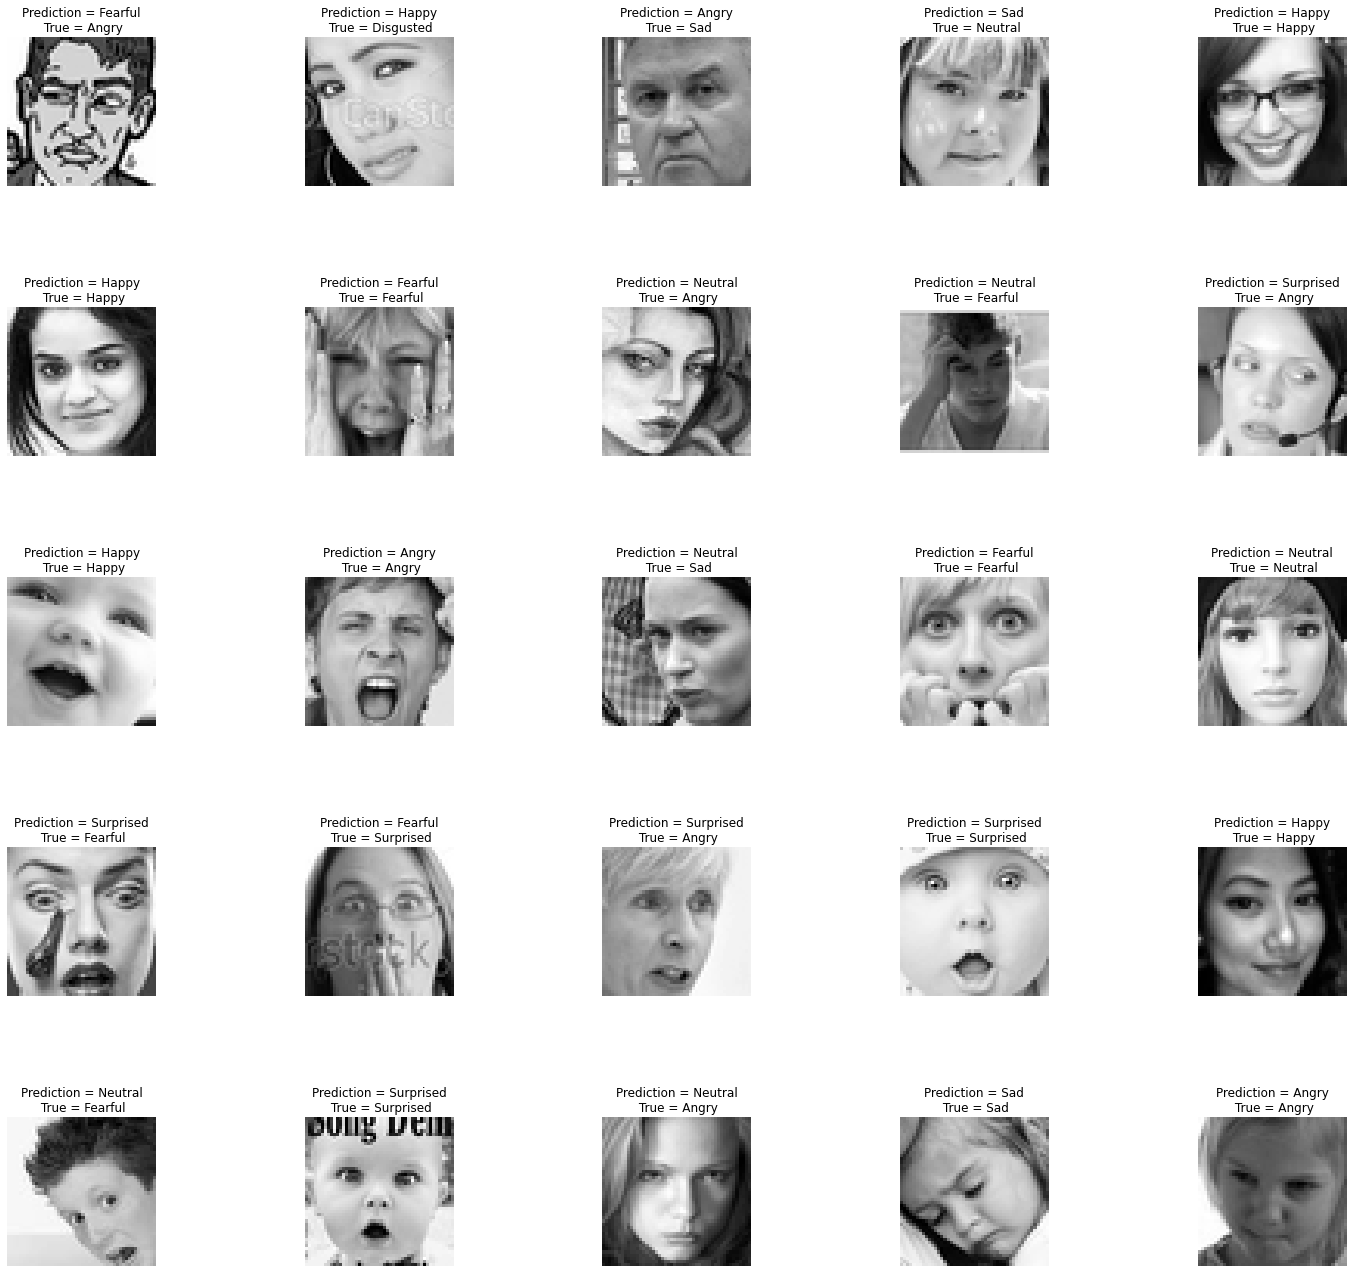

In [117]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(val_x[i].reshape(48,48), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format( emotion_dict[predicted_classes[i]],  emotion_dict[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

## Testing the model on  some images

In [73]:
print(emojis.values(),sep=" ")

dict_values(['😠', '🤢', '😨', '😊', '😥', '😲', '😐'])


In [57]:
cd /content

/root/.kaggle/fer2013
fer2013.bib  fer2013.csv  fer2013_emotion_training.log	README


In [84]:
from google.colab.patches import cv2_imshow
import cv2

def _predict(path):
  facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  imagePath = '/content/'+path
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=10)
  print("No of faces : ",len(faces))
  i = 0
  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_gray = gray[y:y + h, x:x + w]                      #croping
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
    prediction = model.predict(cropped_img)
    i=i+1
    maxindex = int(np.argmax(prediction))
    print("person ",i," : ",emotion_dict[maxindex], "-->",emojis[maxindex])
    cv2.putText(image, emotion_dict[maxindex], (x+10, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)  
                                              #if text is not apeared , change coordinates. it may work
  
  import matplotlib.pyplot as plt
  # load image using cv2....and do processing.
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  # as opencv loads in BGR format by default, we want to show it in RGB.
  plt.show()

In [90]:
from google.colab import files
uploaded = files.upload()

Saving friends.jpeg to friends.jpeg


No of faces :  4
person  1  :  Surprised --> 😲
person  2  :  Neutral --> 😐
person  3  :  Neutral --> 😐
person  4  :  Happy --> 😊


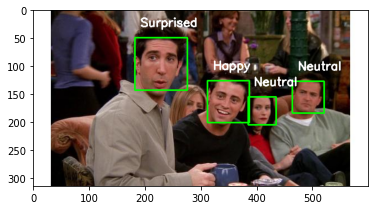

In [116]:
_predict("friends.jpeg")

No of faces :  1
person  1  :  Neutral --> 😐


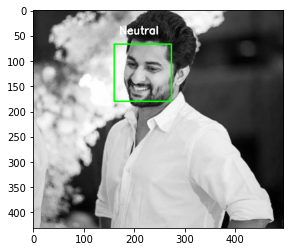

In [118]:
_predict("nani.jpg")

No of faces :  2
person  1  :  Surprised --> 😲
person  2  :  Neutral --> 😐


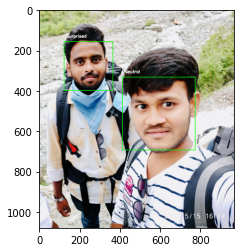

In [120]:
_predict("nithin_sandy.JPG")

No of faces :  1
person  1  :  Happy --> 😊


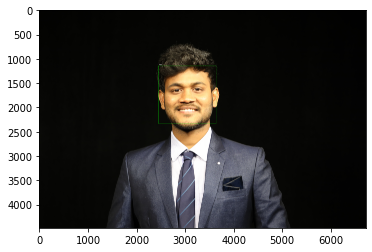

In [119]:
_predict("nithin.JPG")

No of faces :  1
person  1  :  Happy --> 😊


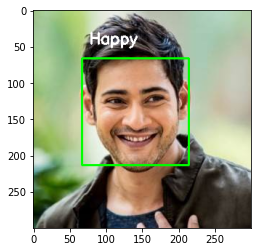

In [111]:
_predict("mb.jpg")

No of faces :  1
person  1  :  Angry --> 😠


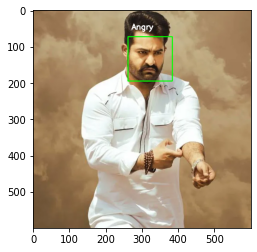

In [101]:
_predict("ntr.jpg")

No of faces :  2
person  1  :  Neutral --> 😐
person  1  :  Surprised --> 😲


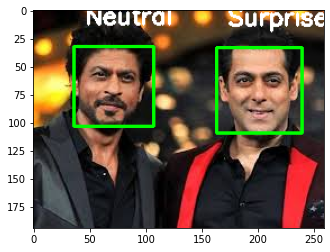

In [75]:
_predict("khans.jpg")

In [92]:
model.save_weights("model.h5")

In [93]:
model.load_weights("model.h5")

In [94]:
from keras.models import model_from_json

In [95]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")

Saved model to disk


In [97]:
""" code snippet for Downloading files from colabs """

from google.colab import files
files.download("model.h5")
files.download("model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
""" loading the model in modular approach """

def load_model_():
  json_file = open('model.json', 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  model = model_from_json(loaded_model_json)
  # load weights into new model
  model.load_weights("model.h5")
  return model


model = load_model_()